In [1]:
library(tidyverse)
library(ggplot2)
options(repr.matrix.max.rows = 20)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [2]:
# download and simplify the bee dataset

bee_df <- read.csv("https://files.ontario.ca/moe_mapping/downloads/4Other/PHAP/Bumble_Bee_Public_Data.csv") |>
    select(1:7, contains("total")) |>
    mutate(site_type = case_when(Site.Type == "Agri" ~ "Agricultural",
                                 Site.Type == "Agriculture" ~ "Agricultural",
                                 Site.Type == "Semi-natural remnant" ~ "Natural",
                                 TRUE ~ Site.Type)) |>
    filter(site_type != "") |>
    pivot_longer(`bimaculatus.total`:`flavidus.total`, values_to = "no_of_bees") |> 
    select(ï..County, site_type, Year, no_of_bees) |> 
    mutate(county = ï..County, year = Year) |> 
    group_by(county, site_type, year) |> 
    summarise(no_of_bees = sum(no_of_bees)) |> 
    arrange(county)

bee_df

`summarise()` has grouped output by 'county', 'site_type'. You can override using the `.groups` argument.



county,site_type,year,no_of_bees
<chr>,<chr>,<int>,<int>
Ashfield-Colborne-Wawanosh,Natural,2015,45
Bruce,Agricultural,2016,9
Bruce,Agricultural,2017,6
Bruce,Natural,2016,12
Bruce,Natural,2017,20
Central Elgin,Agricultural,2015,72
Central Wellington,Agricultural,2015,13
Chatham-Kent,Agricultural,2015,48
Chatham-Kent,Agricultural,2016,43


In [3]:
summary(bee_df)

    county           site_type              year        no_of_bees    
 Length:88          Length:88          Min.   :2015   Min.   :  1.00  
 Class :character   Class :character   1st Qu.:2015   1st Qu.: 17.00  
 Mode  :character   Mode  :character   Median :2016   Median : 36.00  
                                       Mean   :2016   Mean   : 49.27  
                                       3rd Qu.:2017   3rd Qu.: 68.00  
                                       Max.   :2017   Max.   :195.00  

In [4]:
glimpse(bee_df)

Rows: 88
Columns: 4
Groups: county, site_type [60]
$ county     <chr> "Ashfield-Colborne-Wawanosh", "Bruce", "Bruce", "Bruce", "B~
$ site_type  <chr> "Natural", "Agricultural", "Agricultural", "Natural", "Natu~
$ year       <int> 2015, 2016, 2017, 2016, 2017, 2015, 2015, 2015, 2016, 2017,~
$ no_of_bees <int> 45, 9, 6, 12, 20, 72, 13, 48, 43, 14, 49, 48, 42, 6, 37, 71~


In [5]:
table(bee_df$site_type)


Agricultural      Natural 
          44           44 

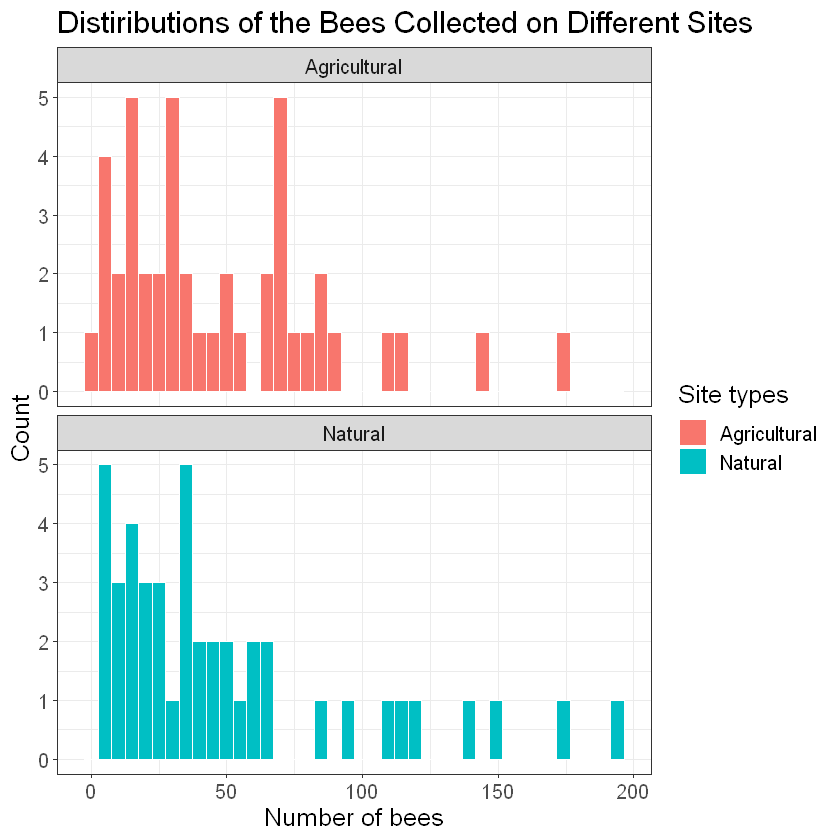

In [6]:
# Distiributions of the bees collected on different sites (Histogram)

bee_df_hist <- ggplot(bee_df) +
    aes(x = no_of_bees,
        fill = site_type) +
    geom_histogram(bins = 40, color = 'white') +
    facet_wrap(~site_type, ncol = 1) +
    labs(x = "Number of bees",
         y = "Count",
         fill = "Site types",
         title = "Distiributions of the Bees Collected on Different Sites"
         ) +
    theme_bw() +
    theme(text =  element_text(size = 15))
    

bee_df_hist

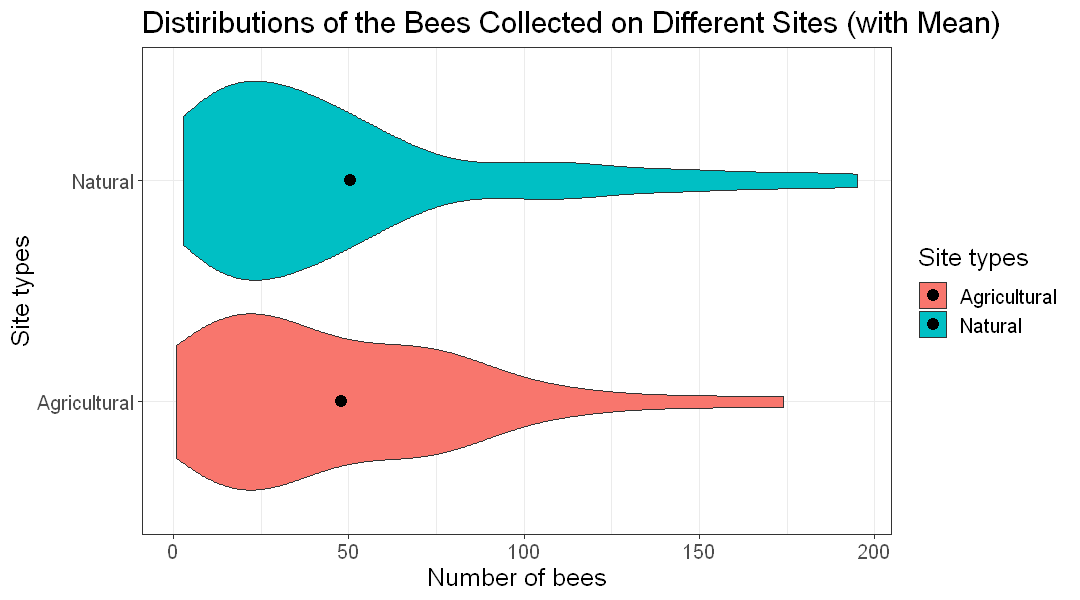

In [7]:
# Distiributions of the bees collected on different sites (Violin Plot with Mean)

options(repr.plot.width=9, repr.plot.height=5)

bee_df_plot <- ggplot(bee_df) +
    aes(y = site_type, 
        x = no_of_bees, 
        fill = site_type) +
    geom_violin() +
    geom_point(stat = 'summary', fun = mean, size = 3) +
    labs(x = "Number of bees",
         y = "Site types",
         fill = "Site types",
         title = "Distiributions of the Bees Collected on Different Sites (with Mean)"
         ) +
    theme_bw() +
    theme(text =  element_text(size = 15))

bee_df_plot

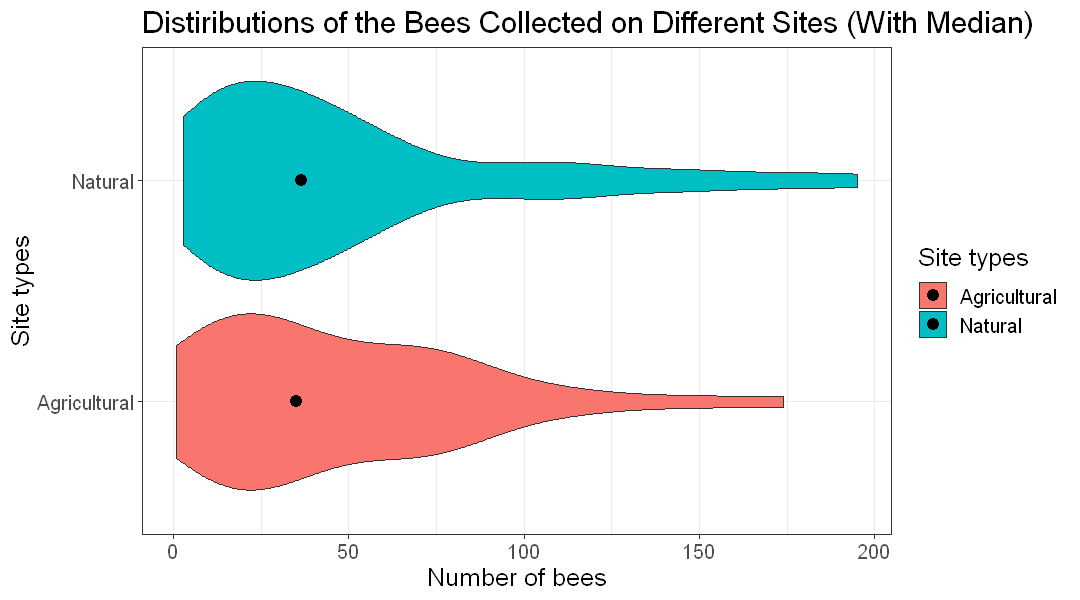

In [8]:
# Distiributions of the bees collected on different sites (Violin Plot with Median)

options(repr.plot.width=9, repr.plot.height=5)

bee_df_plot <- ggplot(bee_df) +
    aes(y = site_type, 
        x = no_of_bees, 
        fill = site_type) +
    geom_violin() +
    geom_point(stat = 'summary', fun = median, size = 3) +
    labs(x = "Number of bees",
         y = "Site types",
         fill = "Site types",
         title = "Distiributions of the Bees Collected on Different Sites (With Median)"
         ) +
    theme_bw() +
    theme(text =  element_text(size = 15))

bee_df_plot